In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import classes.nb_general_2 as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

# What graphs change the most under $\alpha$ page rank?

In [140]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(1,3),(2,4),(4,5),(5,3)])

In [202]:
def alpha_pr(G,alpha,eps=.8):
    L, T = NB_G.create_s_t(G)
    
    mod, base = NB_G.to_edge_space(G,graph=True,B = True)
    edge = nx.to_numpy_array(mod)
    non_btr = nx.to_numpy_array(base)
    
    # Get uniform page rank
    edge_pi = R@la.inv(R.T@R)@np.ones(R.shape[1])/A.shape[0]
    edge_pi = edge_pi/la.norm(edge_pi, ord=1)
    
    edge_personalization = {}
    for i, val in zip(list(mod.nodes()), edge_pi):
        edge_personalization[i] = val
        
    X = alpha*(edge-non_btr)+non_btr
    Y = nx.from_numpy_array(X)
    
    edge_pr = nx.pagerank(Y, alpha=eps, personalization=edge_personalization)
    edge_pr = np.array([edge_pr[i] for i in edge_pr])
    edge_pr = T@edge_pr

    return edge_pr

def make_pr_graph(G):
    DOMAIN = np.linspace(0,1,11)
    A = np.array([alpha_pr(G,i) for i in DOMAIN])
    plt.figure(figsize=(8,6))
    for i in range(A.shape[1]):
        plt.plot(DOMAIN,A[:,i], label=i)
    plt.xlabel("alpha", fontsize=18)
    plt.ylabel("PR Value", fontsize=18)
    plt.show()
    
def make_pr_rank_graph(G):
    DOMAIN = np.linspace(0,1,21)
    A = []
    for d in DOMAIN:
        A.append([np.where(np.argsort(alpha_pr(G,d))==i)[0][0] for i in range(len(G.nodes()))])
    A = np.array(A)
    plt.figure(figsize=(8,6))
    plt.title("0=non backtracking, 1=page rank")
    for i in range(A.shape[1]):
        plt.plot(DOMAIN,A[:,i],'o-',label=i)
    plt.xlabel("alpha", fontsize=18)
    plt.ylabel("Rank", fontsize=18)
    plt.legend(loc='best')
    plt.show()

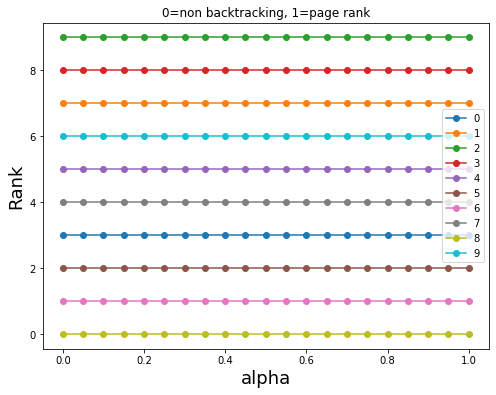

In [203]:
make_pr_rank_graph(G)

# Lets try our toy graphs

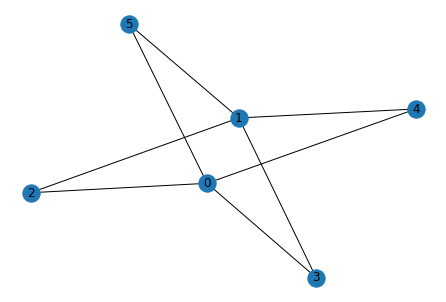

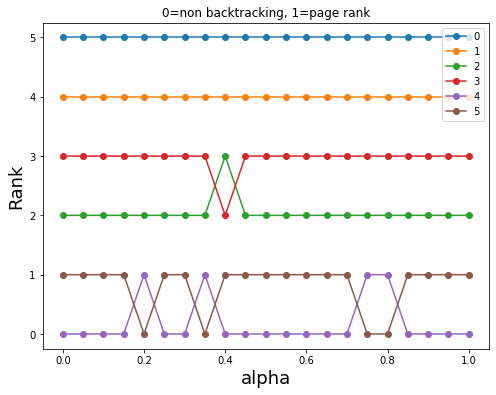

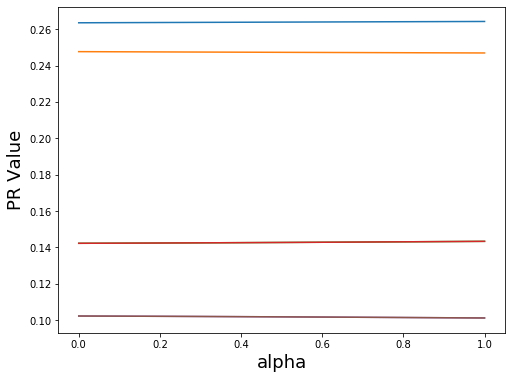

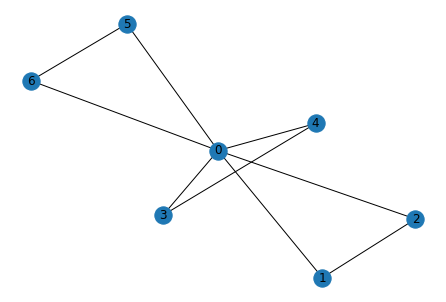

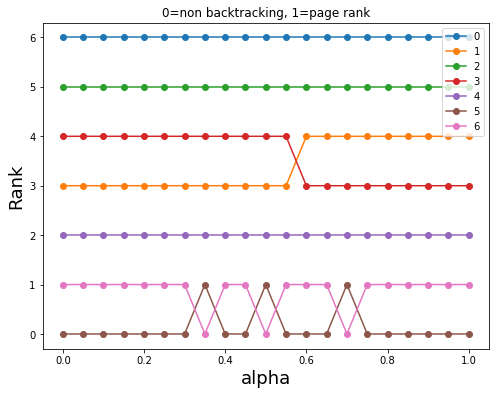

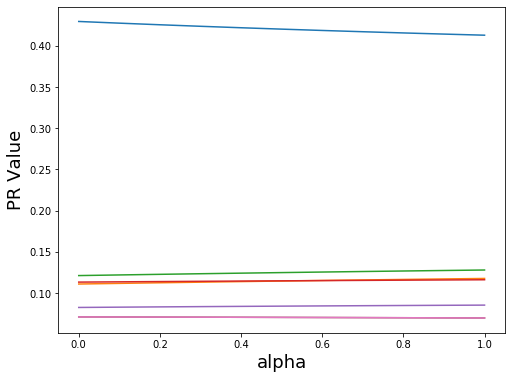

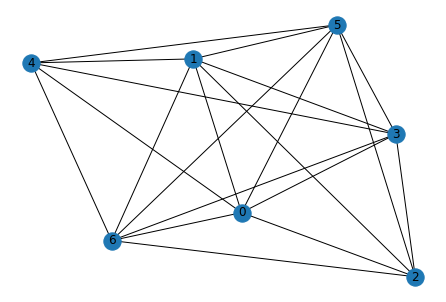

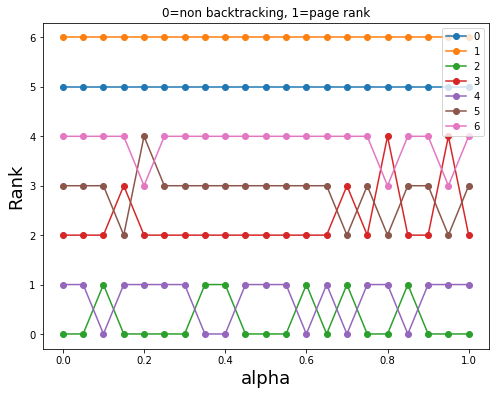

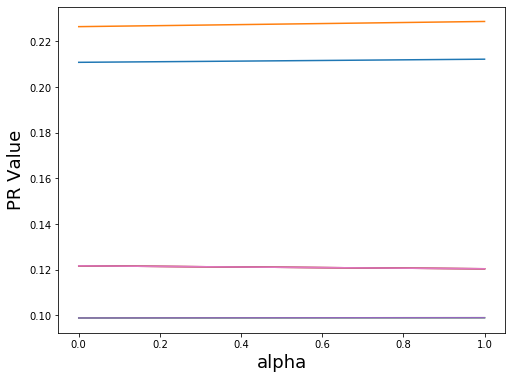

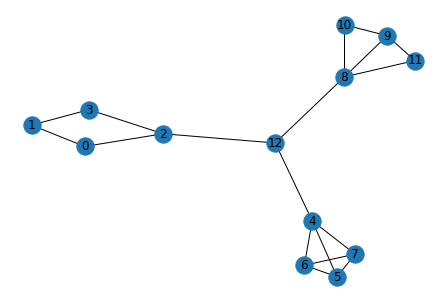

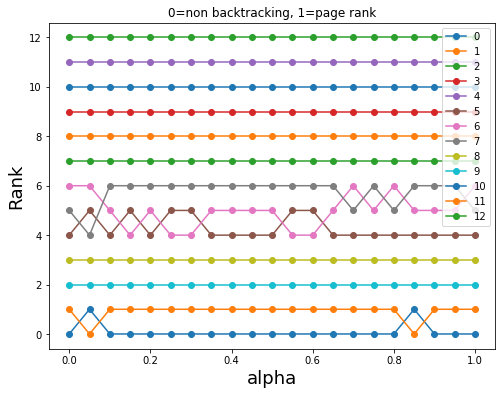

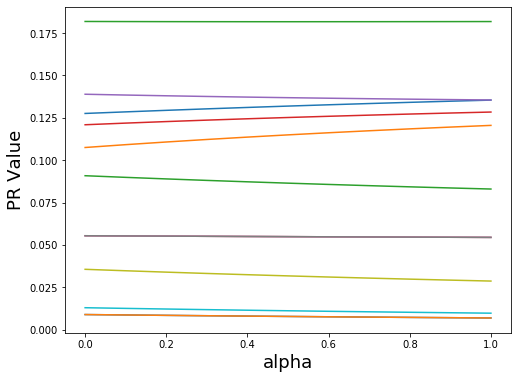

In [205]:
for i in range(4):
    G = nx.read_gml("graph_{}.gml".format(i))
    nx.draw(G,with_labels=True)
    plt.show()
    make_pr_rank_graph(G)
    make_pr_graph(G)

# Lets Check A Bunch Of Random Graphs

Lets pick $k=10$ and try different types of personalization vectors.

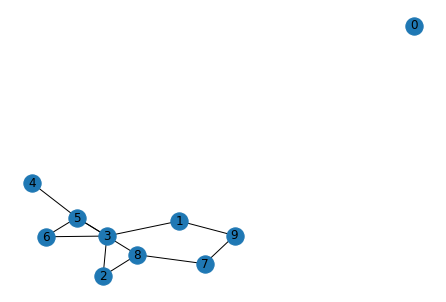

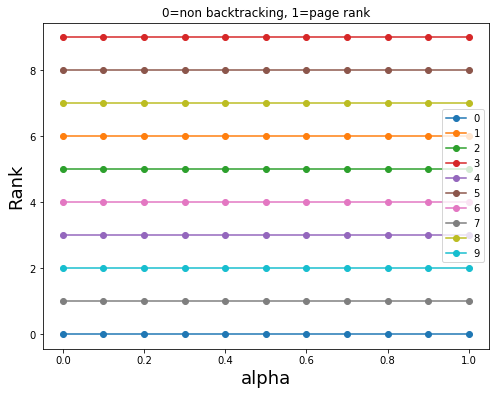

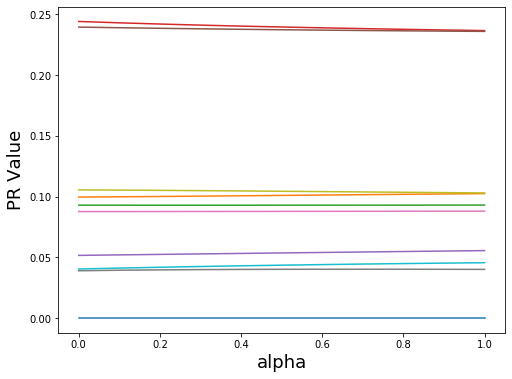

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


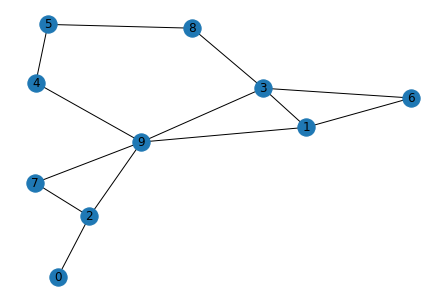

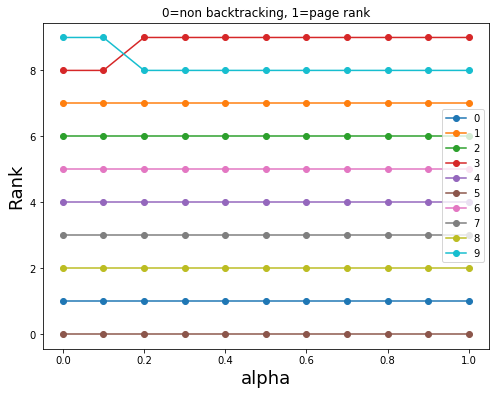

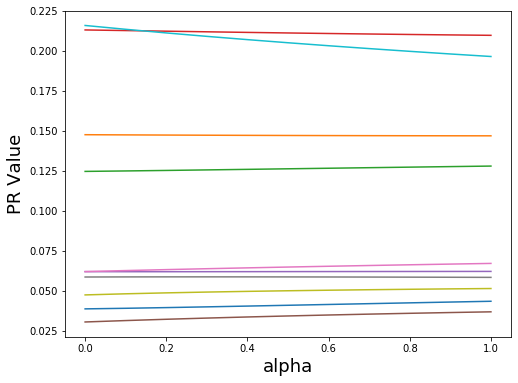

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


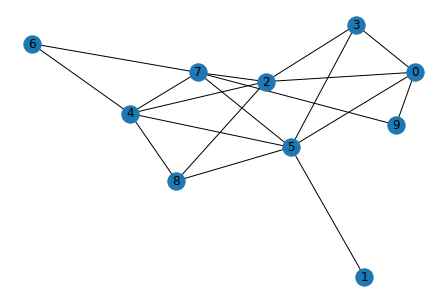

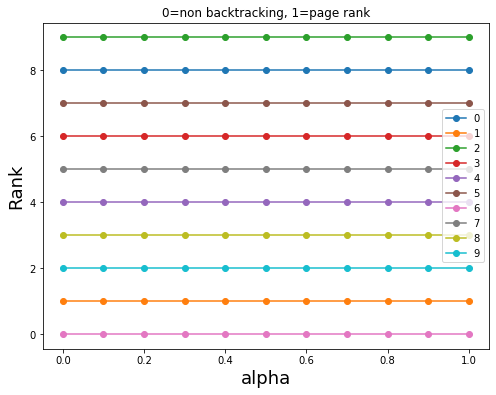

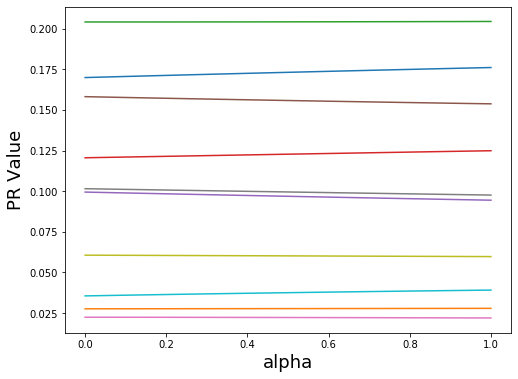

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


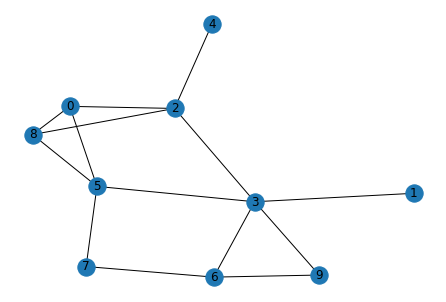

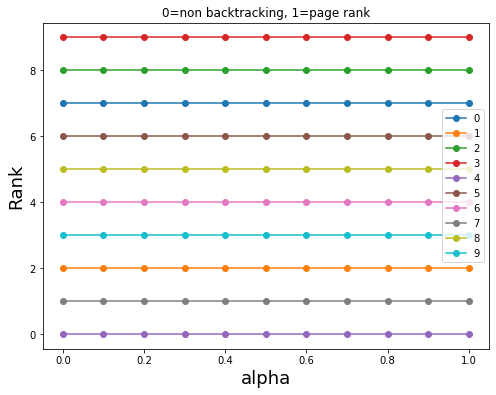

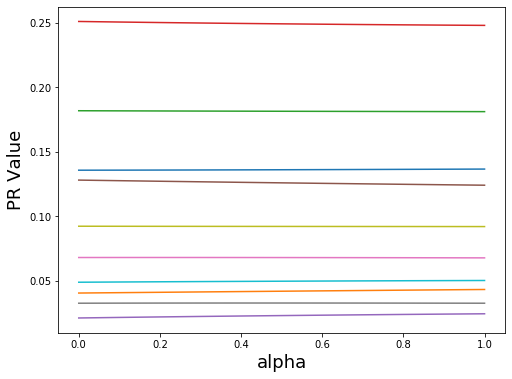

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


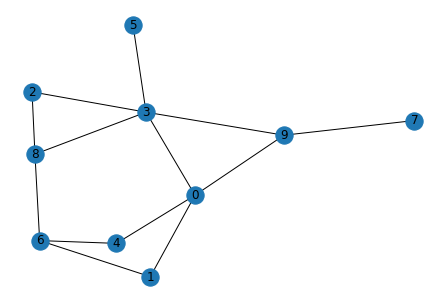

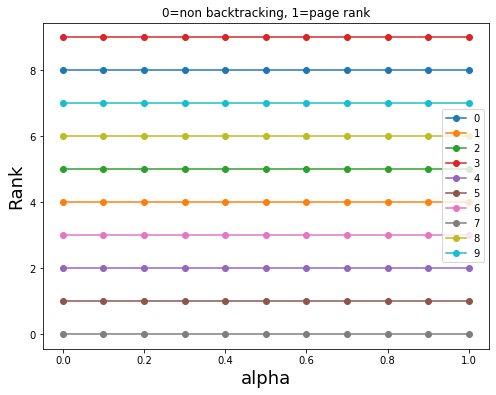

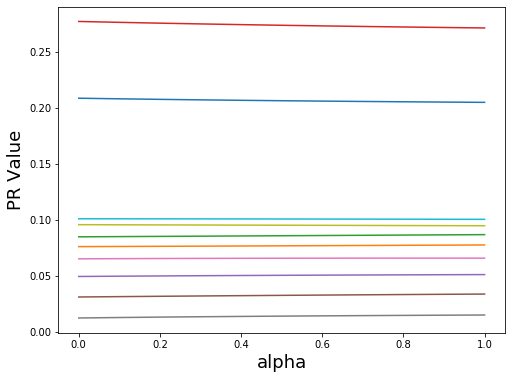

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


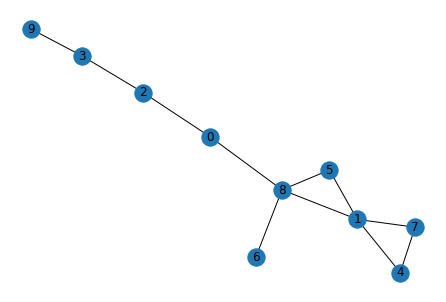

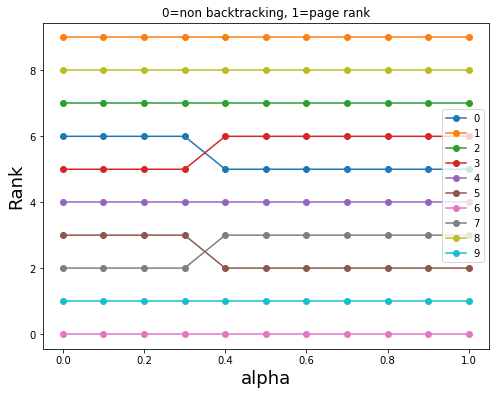

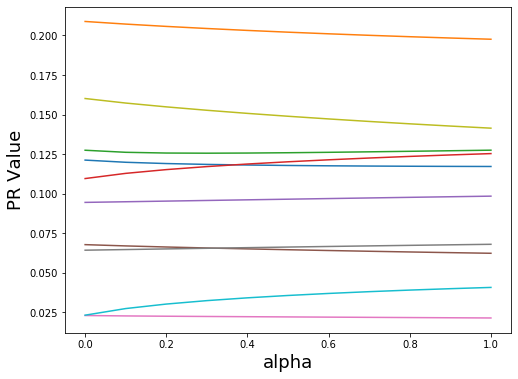

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


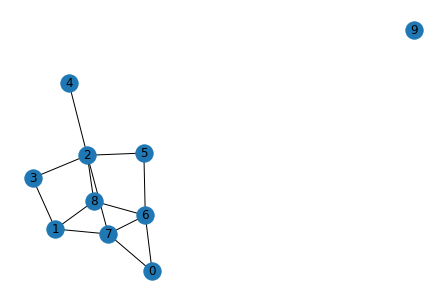

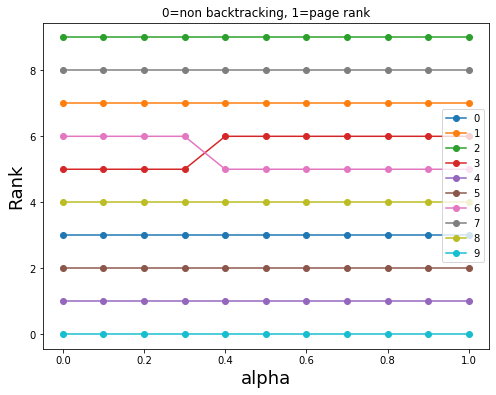

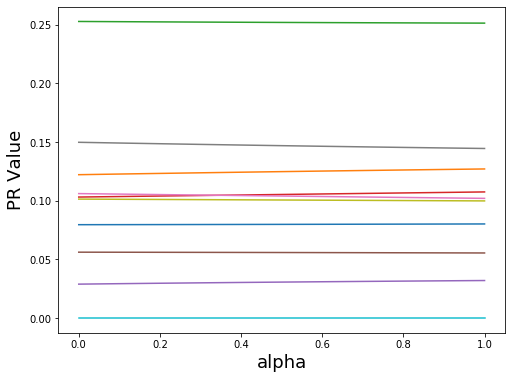

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


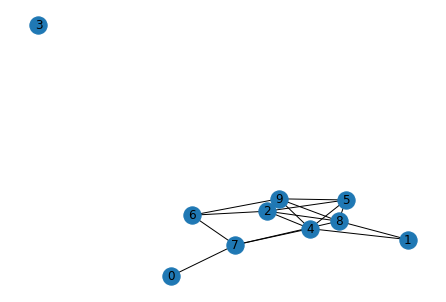

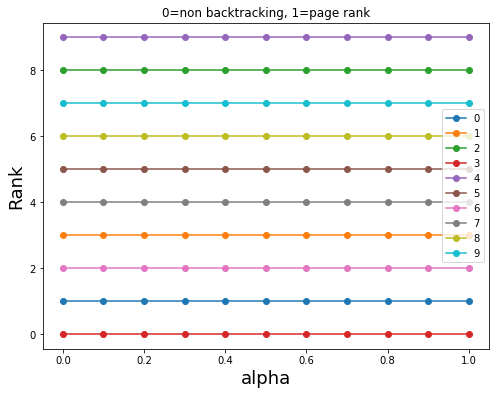

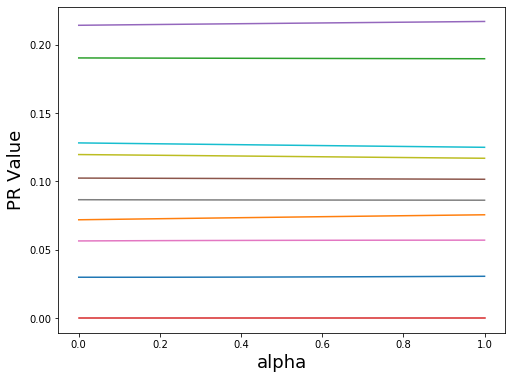

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


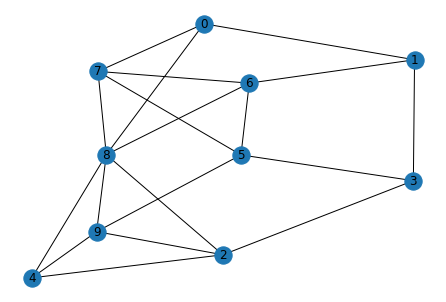

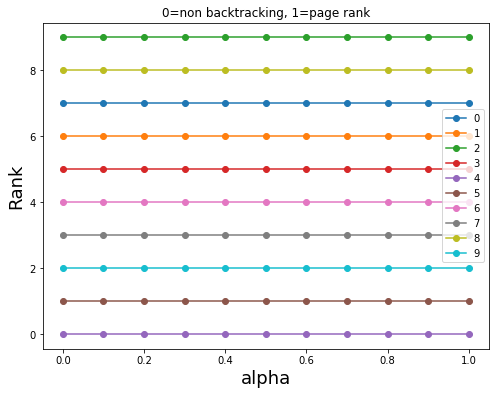

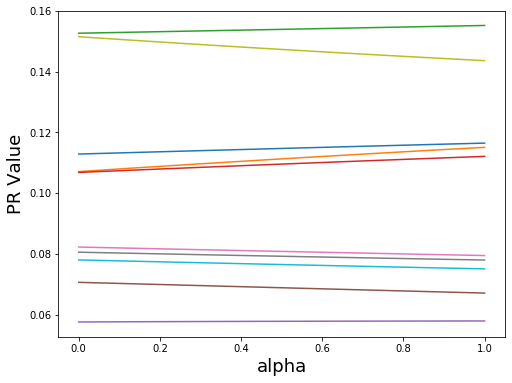

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


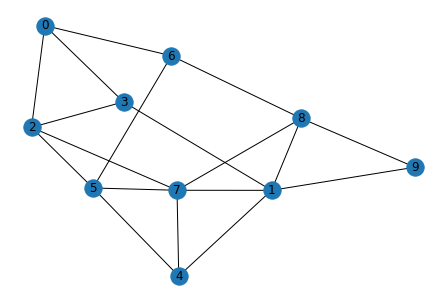

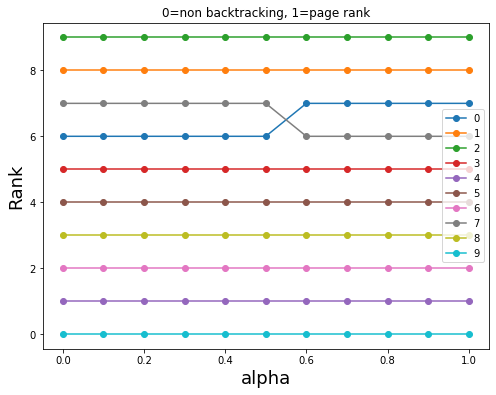

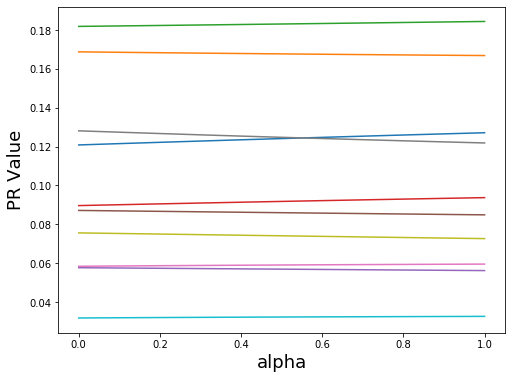

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


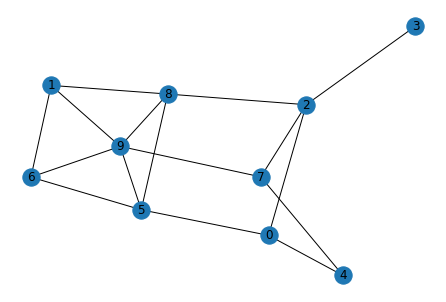

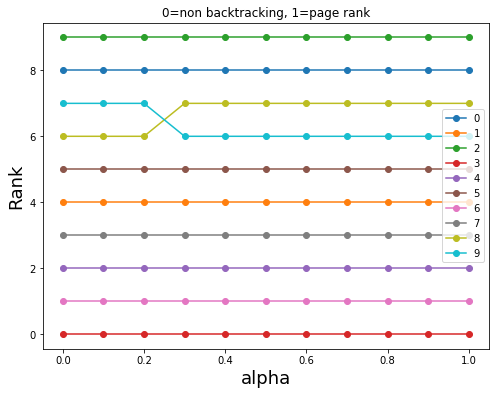

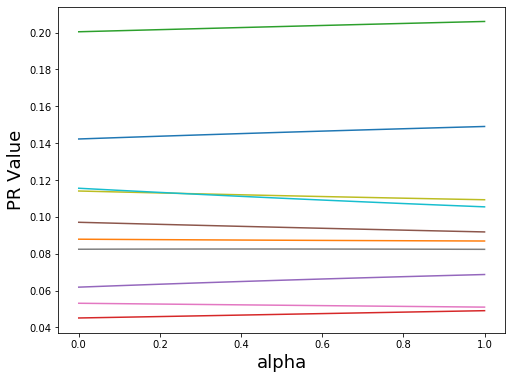

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


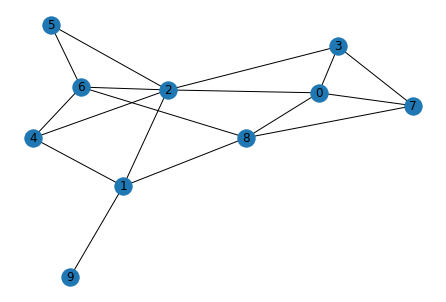

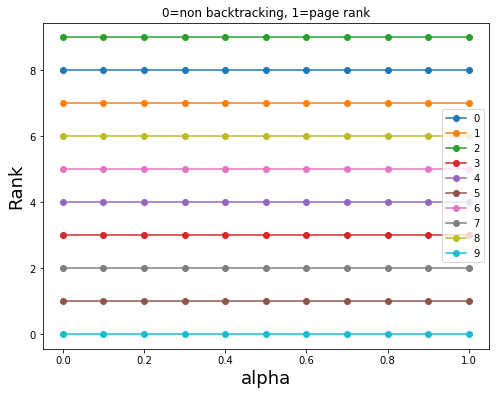

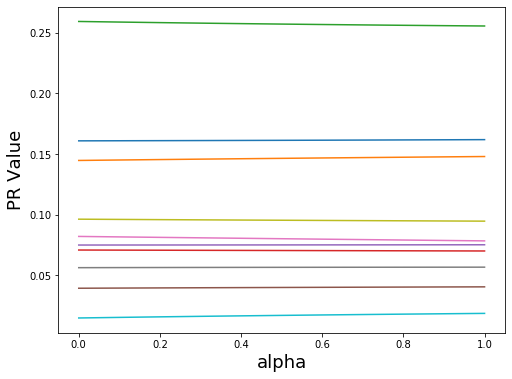

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


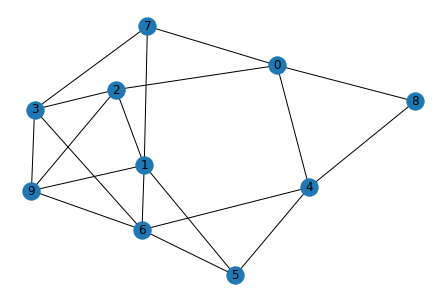

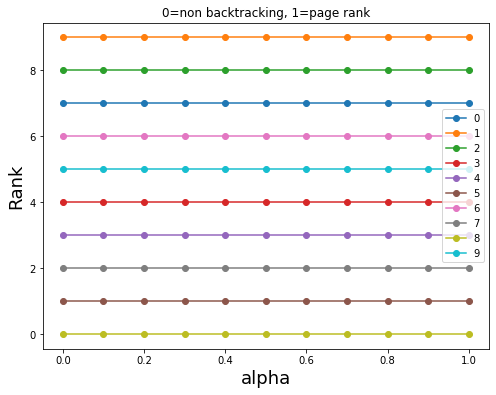

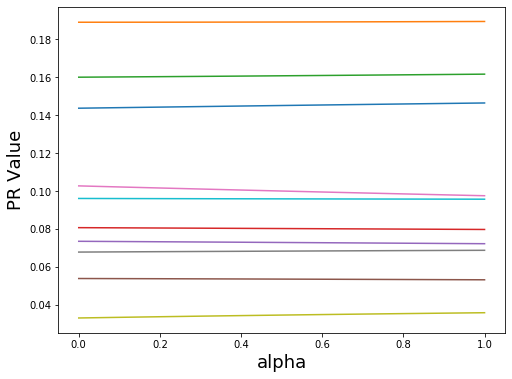

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


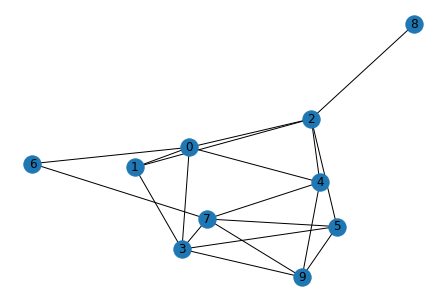

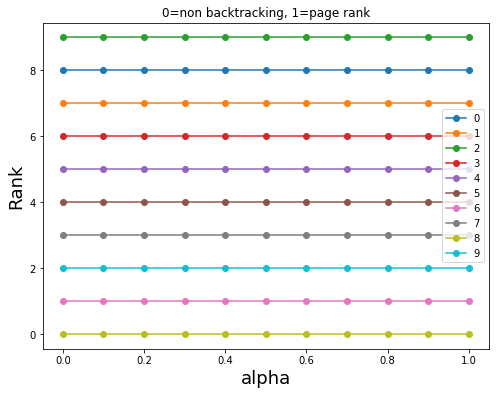

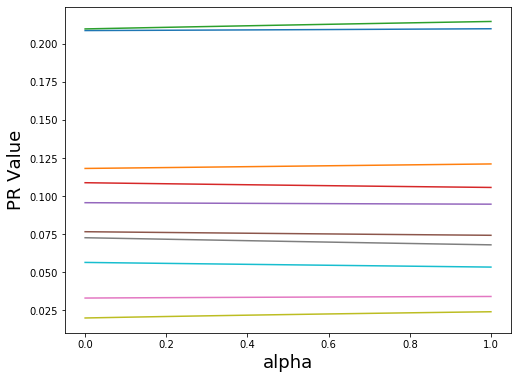

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


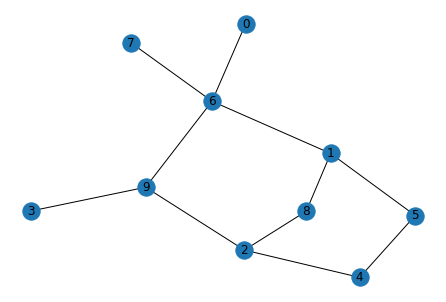

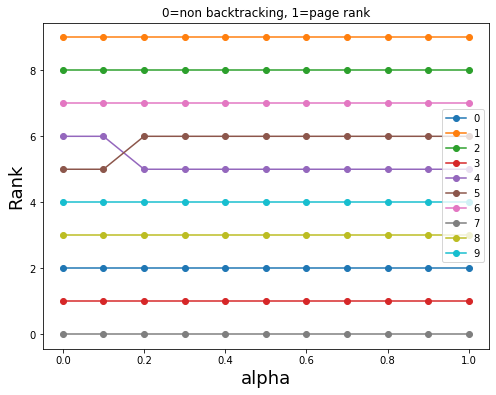

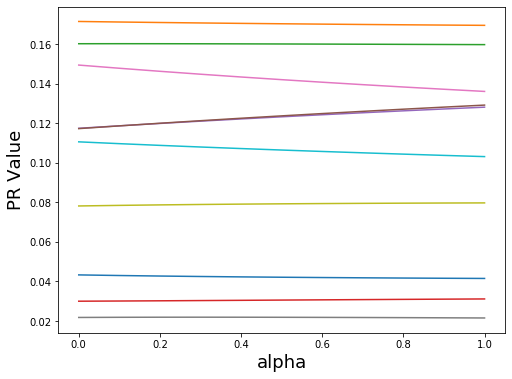

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


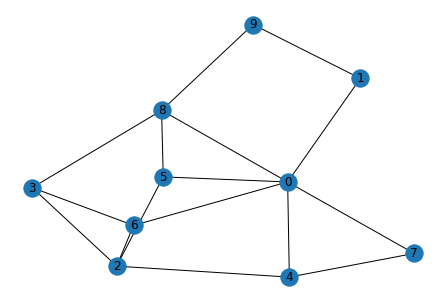

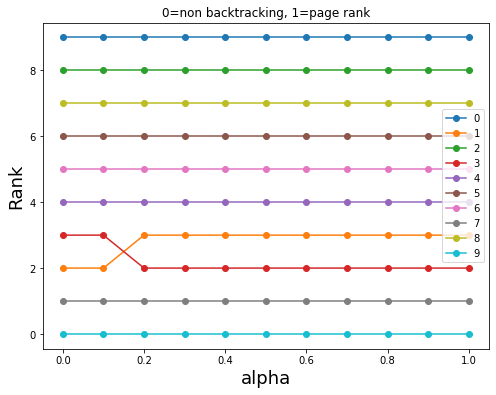

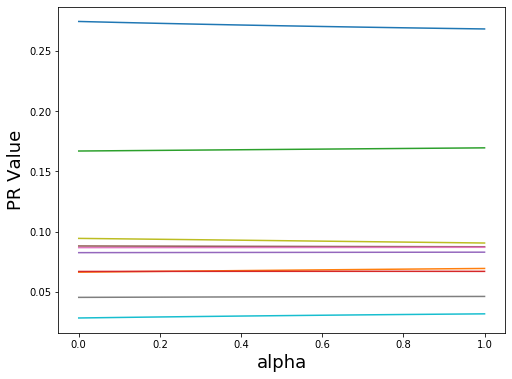

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


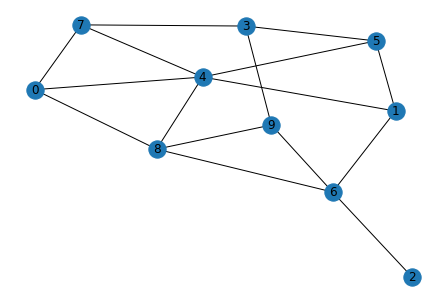

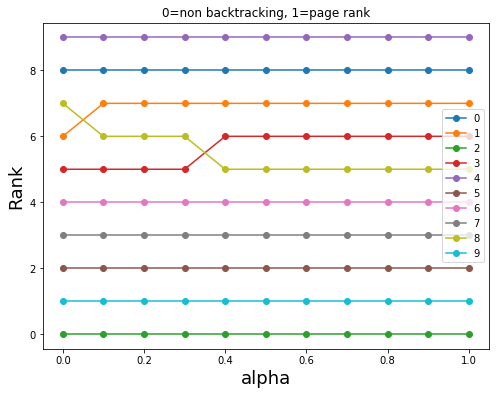

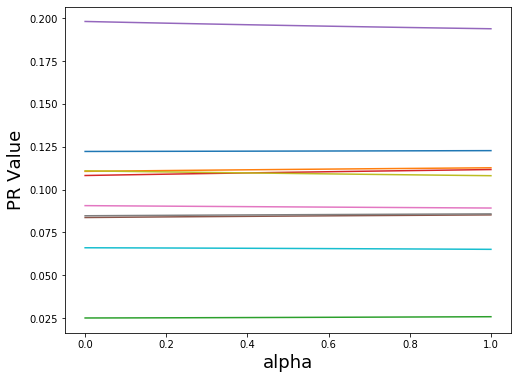

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


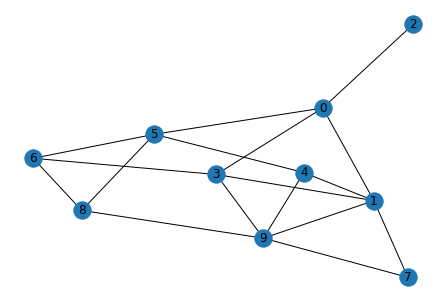

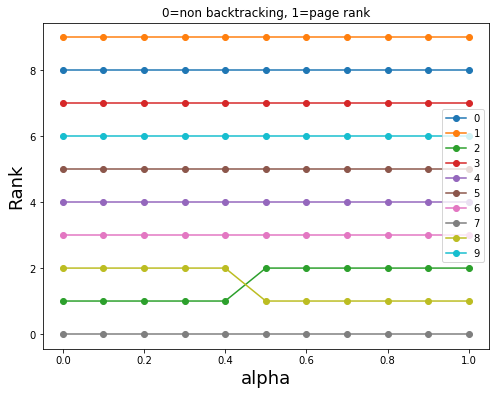

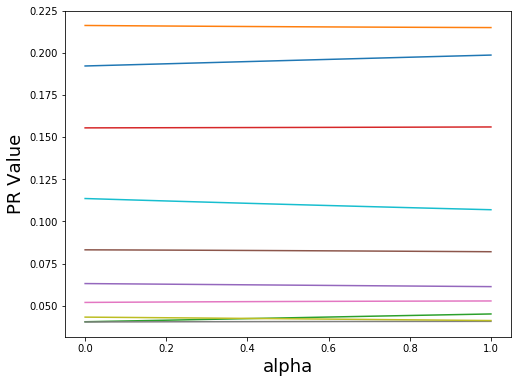

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


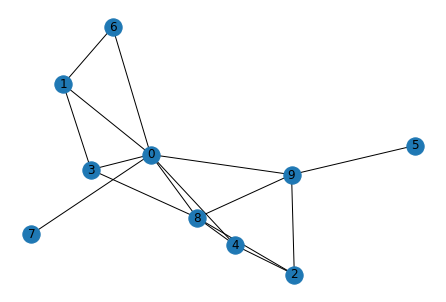

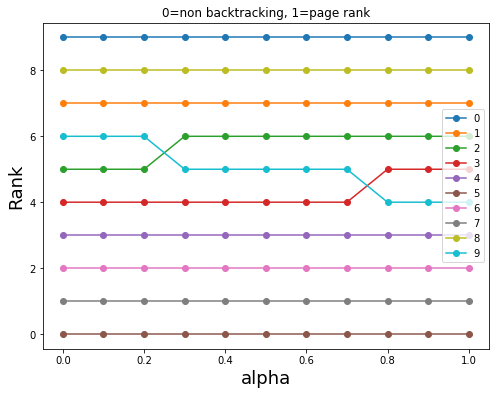

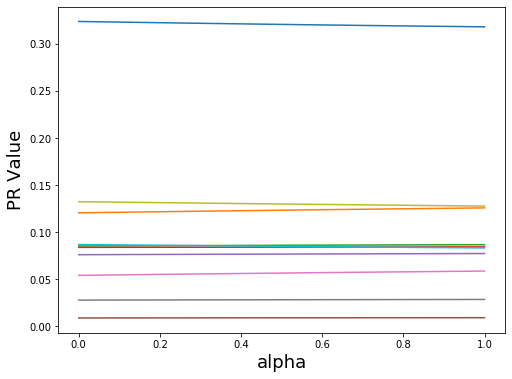

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


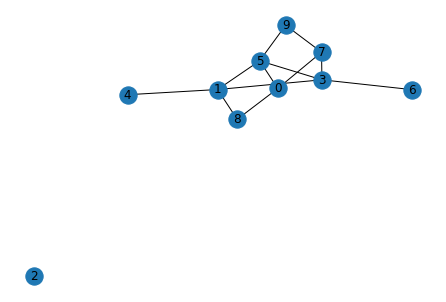

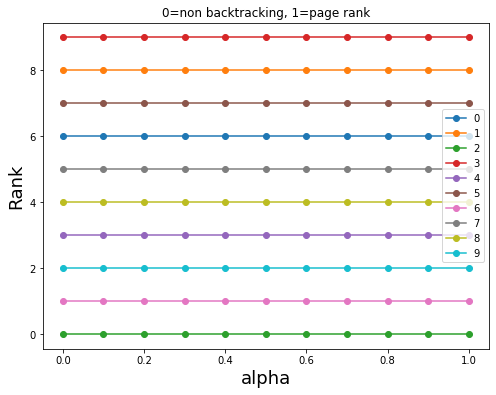

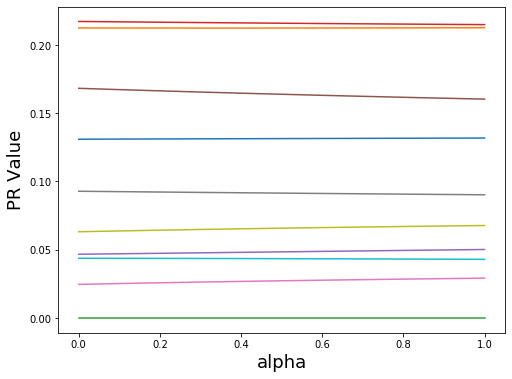

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


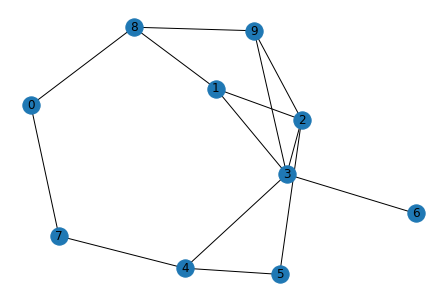

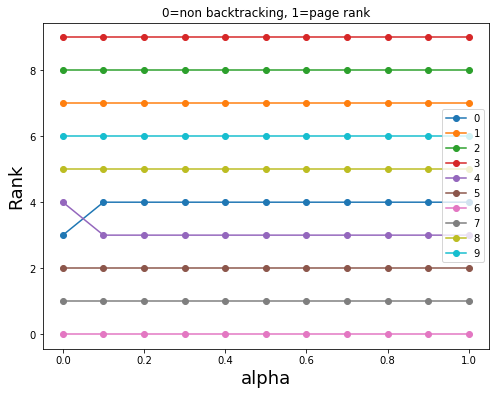

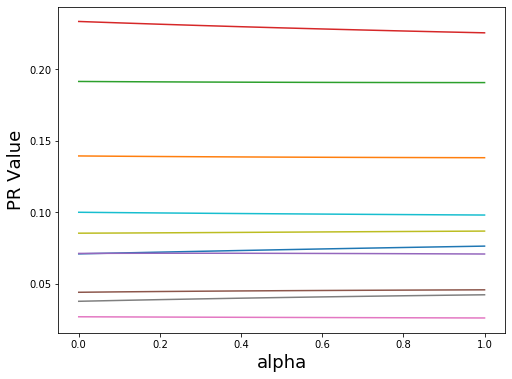

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


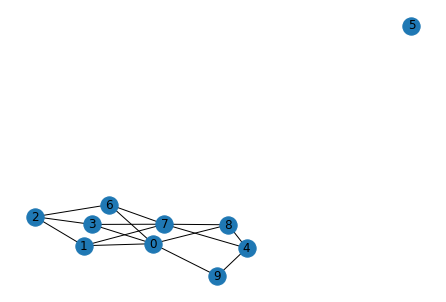

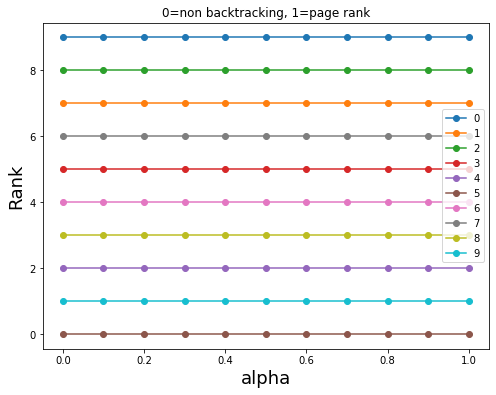

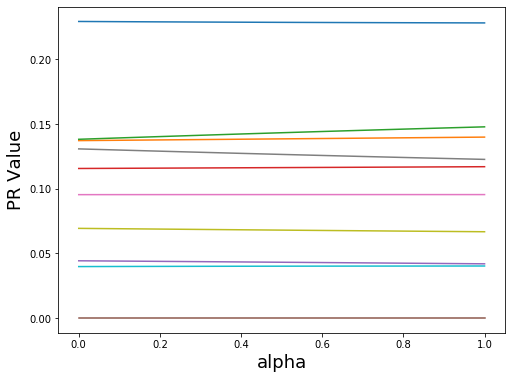

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


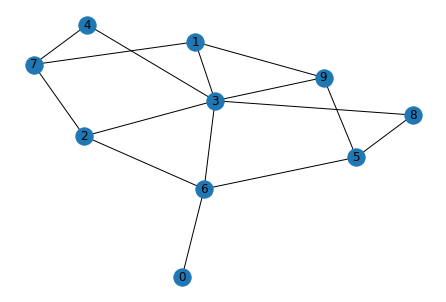

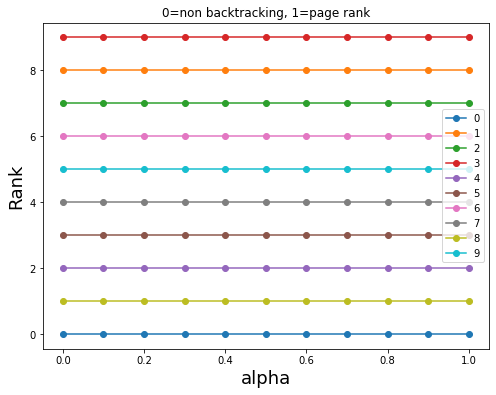

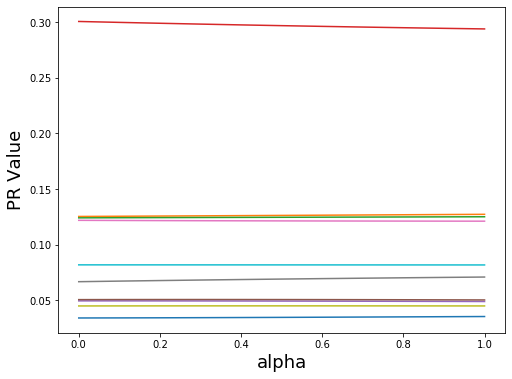

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


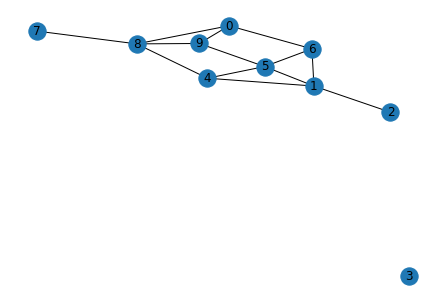

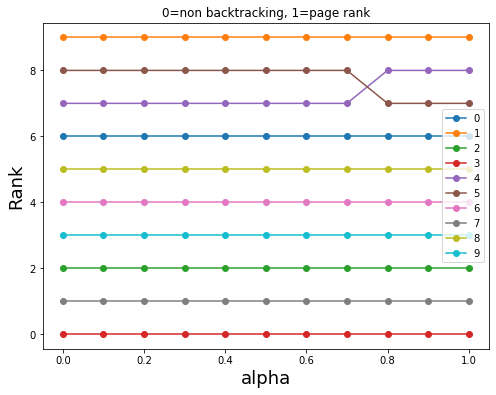

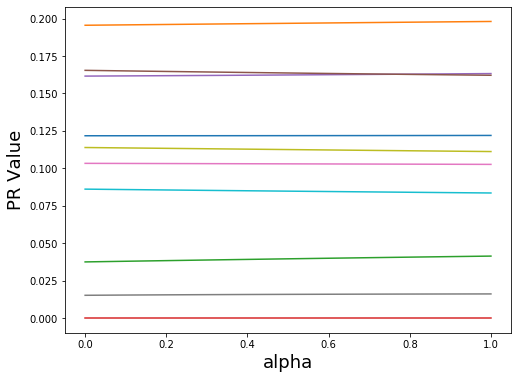

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


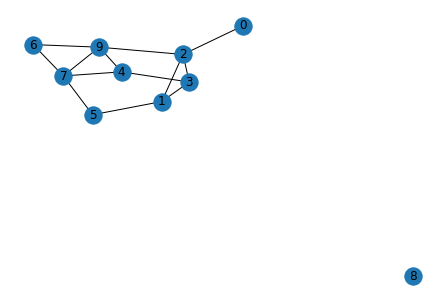

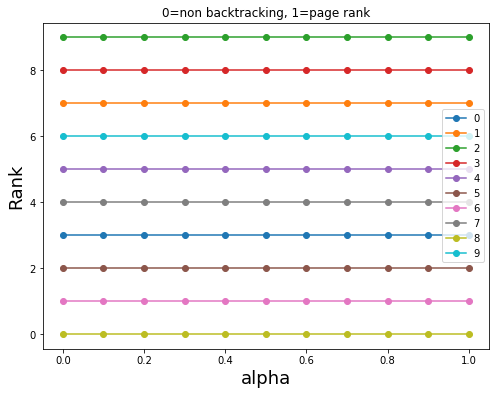

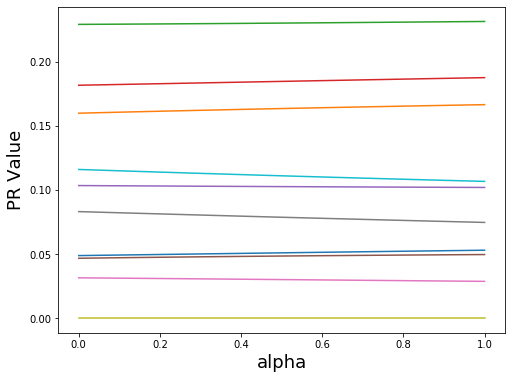

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [201]:
for k in range(25):
    V = 10
    E = np.random.randint(V+1, 2*V)
    G = nx.gnm_random_graph(V,E)
    nx.draw(G, with_labels=True)
    plt.show()
    make_pr_rank_graph(G)
    make_pr_graph(G)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

# Now I'm curious about if one drops in rank, where its rank goes

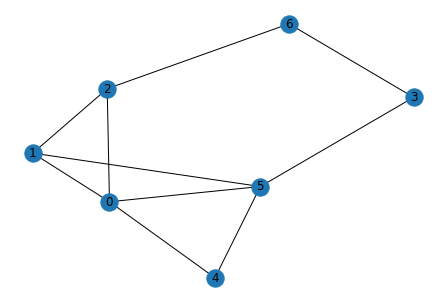

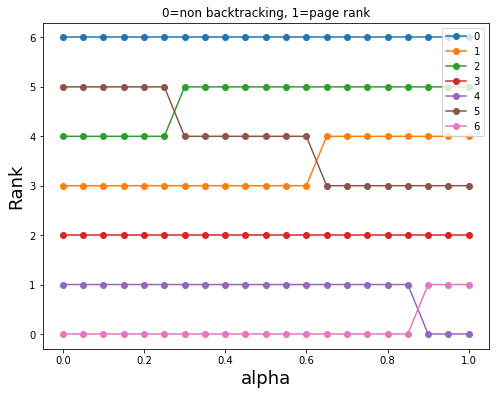

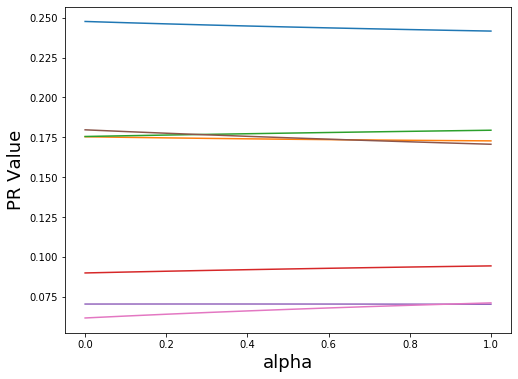

In [212]:
V = 7
E = np.random.randint(V+1, (V*(V-1))/2)
G = nx.gnm_random_graph(V,E)
nx.draw(G, with_labels=True)
plt.show()
make_pr_rank_graph(G)
make_pr_graph(G)

In [190]:
alpha_pr(G,1)

array([0.12016441, 0.05492262, 0.18997129, 0.07056456, 0.05239883,
       0.08716431, 0.12878873, 0.0928299 , 0.05361868, 0.14957668])

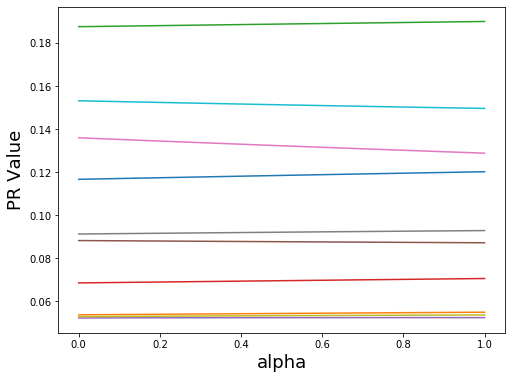

In [191]:
make_pr_graph(G)

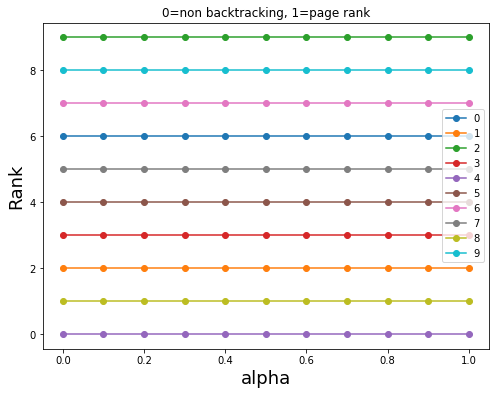

In [192]:
make_pr_rank_graph(G)

In [195]:
G = nx.complete_bipartite_graph(7,4)

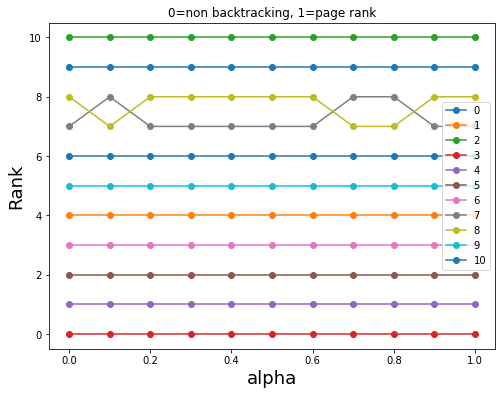

In [196]:
make_pr_rank_graph(G)

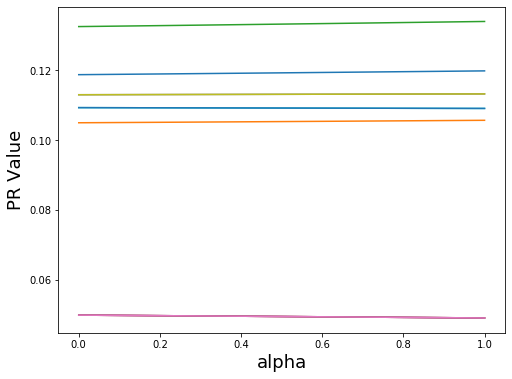

In [197]:
make_pr_graph(G)